# How can frog grow its tail back?


## Data accession

Load data from the link directly or load it through Courseworks .zip file.

In [1]:
!pip -q install scanpy anndata h5py matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.9/169.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 115.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 2.9 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
base = "/content/drive/MyDrive/5243-Project1"
path = f"{base}/cleaned_processed_frogtail.h5ad"

import anndata as ad
adata = ad.read_h5ad(path)

Mounted at /content/drive


/usr/lib/python3.12/functools.py:912: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


In [3]:
import numpy as np

adata.shape

nnz = adata.X.nnz if hasattr(adata.X, "nnz") else np.count_nonzero(adata.X)
density = nnz / (adata.n_obs * adata.n_vars)
print("nonzero density:", density)

print(adata.X[:5, :5].A if hasattr(adata.X, "A") else np.array(adata.X[:5,:5]))

mx = adata.X.max() if not hasattr(adata.X, "max") else adata.X.max()
print("max value (rough):", mx)

nonzero density: 0.07038672193300412
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 0 stored elements and shape (5, 5)>
max value (rough): 9456


In [4]:
adata.obs

,barcode_cells,cell,sample,DevelopmentalStage,DaysPostAmputation,cluster,X,Y,CellCyclePhase,Sample,Lane,Condition,batch
0,AAACCTGAGCTAGTTC.1,AAACCTGAGCTAGTTC.1,SIGAB5,st40,3,Erythrocyte 4,-6.395430,0.832323,G2M,SIGAB5,SLX-15583,ST40_3,3
1,AAACCTGGTGGGTCAA.1,AAACCTGGTGGGTCAA.1,SIGAB5,st40,3,Myeloid 1,-2.428271,13.826715,G1,SIGAB5,SLX-15583,ST40_3,3
2,AAACCTGGTTTGTTGG.1,AAACCTGGTTTGTTGG.1,SIGAB5,st40,3,Beta ionocyte,-1.398049,-14.653897,G1,SIGAB5,SLX-15583,ST40_3,3
3,AAACGGGGTCGGCATC.1,AAACGGGGTCGGCATC.1,SIGAB5,st40,3,Erythrocyte 4,-5.863765,0.489598,G2M,SIGAB5,SLX-15583,ST40_3,3
4,AAACGGGTCCTACAGA.1,AAACGGGTCCTACAGA.1,SIGAB5,st40,3,Goblet cell,2.106444,-6.594430,G1,SIGAB5,SLX-15583,ST40_3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13194,TTCTTAGAGTACCGGA.1,TTCTTAGAGTACCGGA.1,SIGAB10,st40,3,Erythrocyte 4,-5.879582,0.924197,G2M,SIGAB10,SLX-15739,ST40_3,4
13195,TTGACTTAGAGTAAGG.1,TTGACTTAGAGTAAGG.1,SIGAB10,st40,3,Goblet cell,1.252149,-8.870151,G1,SIGAB10,SLX-15739,ST40_3,4
13196,TTGCGTCTCAAGAAGT.1,TTGCGTCTCAAGAAGT.1,SIGAB10,st40,3,Goblet cell,0.693335,-9.168521,G1,SIGAB10,SLX-15739,ST40_3,4
13197,TTGTAGGCAGTACACT.1,TTGTAGGCAGTACACT.1,SIGAB10,st40,3,Erythrocyte 1,-4.087618,4.145738,G1,SIGAB10,SLX-15739,ST40_3,4


In [5]:
adata

AnnData object with n_obs × n_vars = 13199 × 31535
    obs: 'barcode_cells', 'cell', 'sample', 'DevelopmentalStage', 'DaysPostAmputation', 'cluster', 'X', 'Y', 'CellCyclePhase', 'Sample', 'Lane', 'Condition', 'batch'

## Processing data

In [6]:
adata.layers["counts"] = adata.X.copy()


In [7]:
import scanpy as sc

sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [8]:
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.highly_variable_genes(adata, n_top_genes=2300)

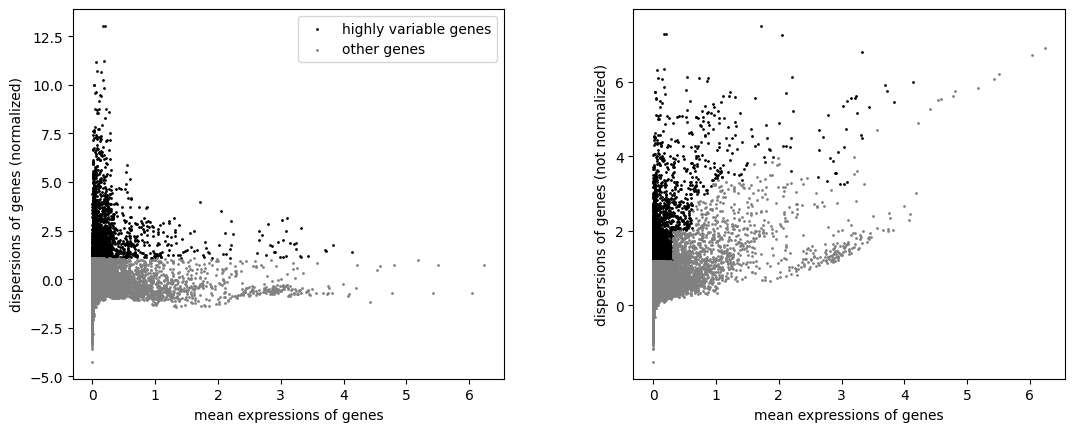

In [9]:
sc.pl.highly_variable_genes(adata)

## Data Visualization

In [10]:
import scanpy as sc
import numpy as np
import pandas as pd
import os, re

# PCA
sc.tl.pca(adata, n_comps=50, svd_solver='arpack', random_state=0)
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=30, random_state=0)
sc.tl.umap(adata, random_state=0, min_dist=0.05, spread=1.0)

In [11]:
adata.obs['cluster'].unique()

['Erythrocyte 4', 'Myeloid 1', 'Beta ionocyte', 'Goblet cell', 'Erythrocyte 1', ..., 'Smooth muscle', 'Syndetome', 'Differentiating myocyte', 'Oligodendrocyte', 'Lymphoid endothelial cells']
Length: 46
Categories (46, object): ['Alpha ionocyte', 'Anterior notochord', 'Beta ionocyte', 'Dermomyotome', ...,
                          'Syndetome', 'Vascular endothelial cell', 'Vulnerable Motor Neuron',
                          'laminin-rich epidermis']

In [12]:
pattern_map = [
    # Neural
    (r"interneuron\s*\d+",                 "Neural"),
    (r"motor neuron(\s*\(leptin\+\))?",    "Neural"),
    (r"vulnerable\s+motor\s+neuron",       "Neural"),
    (r"dopaminergic",                      "Neural"),
    (r"differentiating\s+neuron",          "Neural"),
    (r"oligodendro",                       "Neural"),
    (r"spinal\s+cord\s+progenitor",        "Neural"),
    (r"floor\s+plate",                      "Neural"),

    # Skin
    (r"\bepidermis\b",                     "Skin"),
    (r"laminin[-\s]?rich\s+epidermis",     "Skin"),
    (r"regeneration\s+organizing\s*cell(s)?",  "Skin"),
    (r"\broc(s)?\b",                       "Skin"),

    (r"goblet\s+cell",                     "Skin"),
    (r"ionocyte",                          "Skin"),
    (r"melanocyte\s*(precursor|stem\s*cell)?", "Skin"),
    (r"small\s+secretory\s+cell",          "Skin"),

    # Somite & others
    (r"sclerotome",                        "Somite and others"),
    (r"dermomyotome",                      "Somite and others"),
    (r"myotome",                           "Somite and others"),
    (r"differentiating\s+myocyte",         "Somite and others"),
    (r"satellite\s+cell",                  "Somite and others"),
    (r"mesenchyme",                        "Somite and others"),
    (r"syndetome",                         "Somite and others"),
    (r"smooth\s+muscle",                   "Somite and others"),
    (r"skeletal\s+muscle",                 "Somite and others"),
    (r"anterior\s+notochord",              "Somite and others"),
    (r"posterior\s+notochord",             "Somite and others"),
    (r"vascular\s+endothelial\s+cell",     "Somite and others"),
    (r"lymphoid\s+endothelial\s+cell[s]?", "Somite and others"),

    # Immune
    (r"myeloid\s*\d*",                     "Immune"),
    (r"\blymphoid\s+\d+(\s*\(.*\))?",      "Immune"),

    # RBC
    (r"erythrocyte[s]?\s*\d*",             "Red blood cells"),
    (r"red\s+blood\s+cell[s]?",            "Red blood cells"),
]

In [13]:
import re, pandas as pd

def map_major_label(x: str) -> str:
    s = str(x).lower().strip()
    for pat, major in pattern_map:
        if re.search(pat, s):
            return major
    return "Other"

In [14]:
adata.obs['major_lineage'] = (
    adata.obs['cluster'].astype(str).map(map_major_label).astype('category')
)

In [15]:
unmapped = (
    adata.obs.loc[adata.obs['major_lineage'].eq("Other"), 'cluster']
    .astype(str).value_counts()
)
print("Unmapped labels (need manual mapping):")
display(unmapped.head(50))

Unmapped labels (need manual mapping):


,count
cluster,


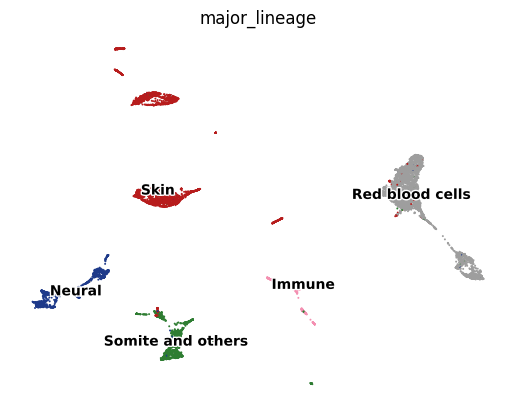

In [16]:
# Global UMAP
import scanpy as sc, os

adata.obs['major_lineage'] = adata.obs['major_lineage'].astype('category')
palette_major = {
    "Somite and others": "#2E7D32",
    "Skin":               "#B71C1C",
    "Neural":             "#1E3A8A",
    "Immune":             "#F48FB1",
    "Red blood cells":    "#9E9E9E",
    "Other":              "#BDBDBD",
}
cats = adata.obs['major_lineage'].cat.categories
adata.uns['major_lineage_colors'] = [palette_major.get(c, "#BDBDBD") for c in cats]


NB, NPCS, MIN_DIST, SPREAD = 40, 30, 0.02, 0.6

sc.pp.neighbors(adata, n_neighbors=NB, n_pcs=NPCS, random_state=0)
sc.tl.umap(adata, min_dist=MIN_DIST, spread=SPREAD, random_state=0)

sc.pl.umap(
    adata,
    color="major_lineage",
    legend_loc="on data",
    legend_fontsize=10,
    legend_fontoutline=2,
    frameon=False,
    size=8
)


/usr/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


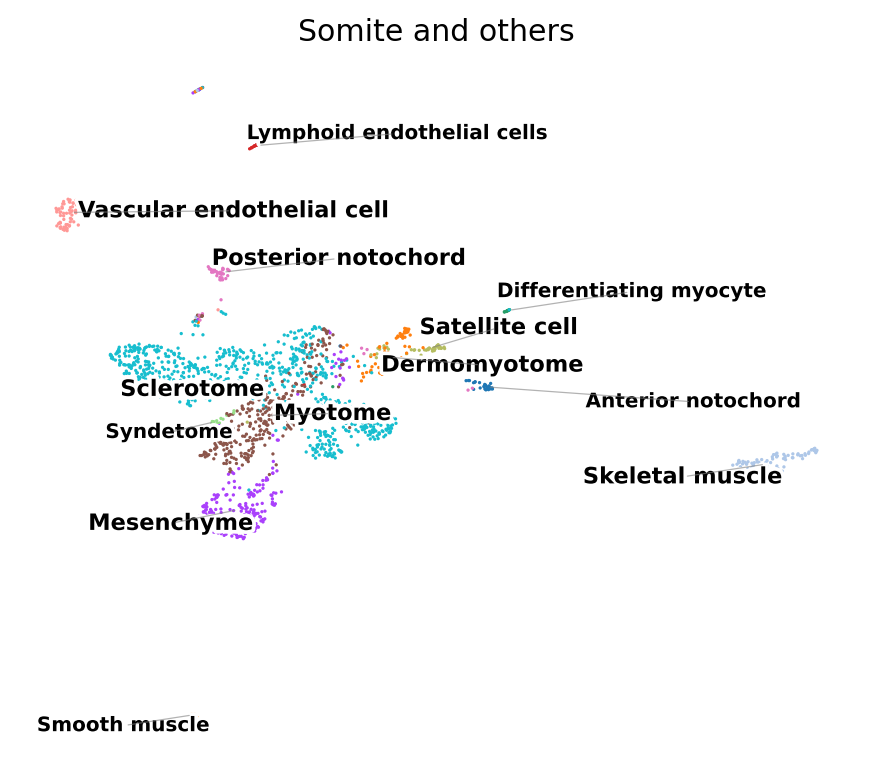

/usr/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


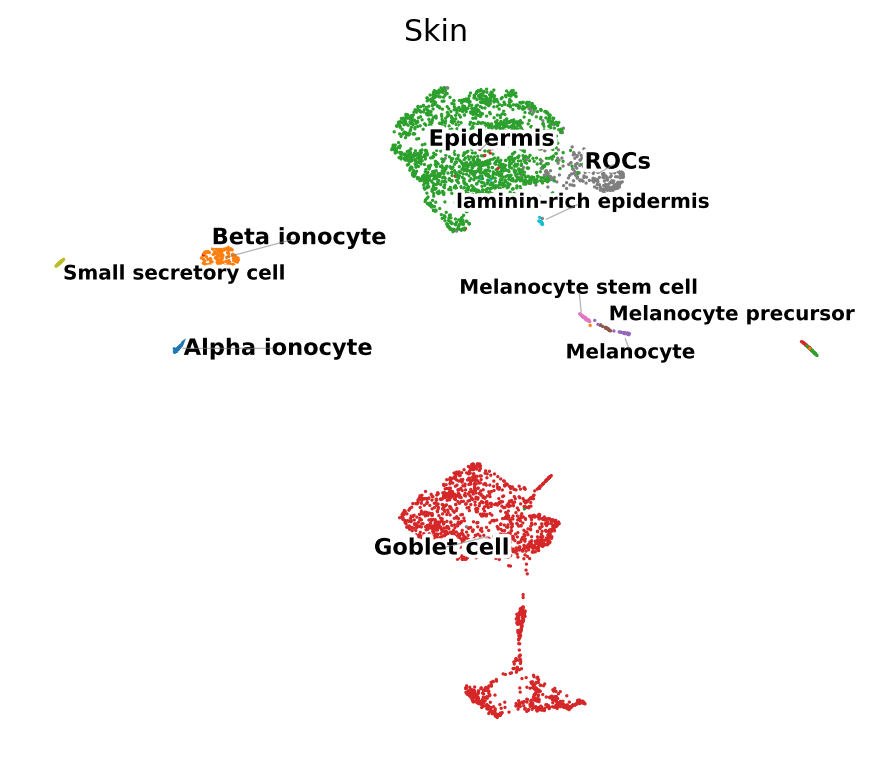

/usr/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


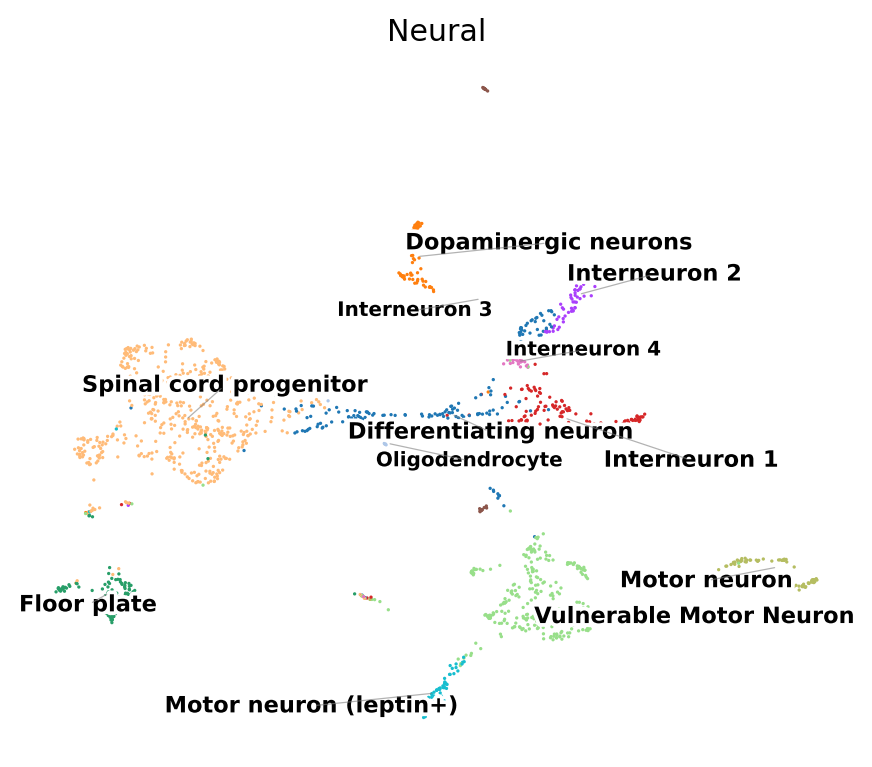

In [17]:
# Subset UMAP
import numpy as np, pandas as pd, scanpy as sc
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

try:
    from adjustText import adjust_text
except Exception:
    !pip -q install adjustText
    from adjustText import adjust_text



def umap_subset_pretty_all_labels(
    adata,
    lineage: str,
    color: str = "cluster",
    n_neighbors: int = 25,
    min_dist: float = 0.20,
    point_size: float = 7,
    seed: int = 0,
):
    ad = adata[adata.obs["major_lineage"] == lineage].copy()
    if ad.n_obs < 10:
        print(f"{lineage}: too few cells ({ad.n_obs}), skip.");
        return ad

    sc.pp.highly_variable_genes(ad, n_top_genes=min(3000, ad.n_vars), subset=True)
    sc.pp.scale(ad, max_value=10)
    sc.tl.pca(ad, n_comps=min(30, ad.n_vars-1), svd_solver="arpack", random_state=seed)
    sc.pp.neighbors(ad, n_neighbors=n_neighbors,
                    n_pcs=min(30, ad.obsm["X_pca"].shape[1]), random_state=seed)
    sc.tl.umap(ad, min_dist=min_dist, random_state=seed)

    fig, ax = plt.subplots(figsize=(6,5), dpi=180)
    sc.pl.umap(ad, color=color, legend_loc=None, frameon=False,
               size=point_size, ax=ax, show=False)
    ax.set_title(lineage)


    coords = pd.DataFrame(ad.obsm["X_umap"], columns=["x","y"])
    labs = ad.obs[color].astype(str)
    coords["lab"] = labs.values
    centers = coords.groupby("lab")[["x","y"]].median()
    counts  = coords["lab"].value_counts()

    rng = np.random.default_rng(seed)
    texts = []
    for lab, (xv, yv) in centers.iterrows():
        cnt = int(counts.loc[lab])
        j  = 0.03 if cnt < 40 else 0.0
        fs = 8    if cnt < 40 else 9
        txt = ax.text(
            xv + rng.normal(0, j), yv + rng.normal(0, j), lab,
            ha="center", va="center", fontsize=fs, weight="bold", color="black",
            path_effects=[pe.withStroke(linewidth=3, foreground="white")]
        )
        texts.append(txt)


    adjust_text(
        texts, ax=ax, only_move={"points":"xy","texts":"xy"},
        expand_points=(1.1,1.2), expand_text=(1.05,1.2),
        force_text=(0.25,0.35),
        arrowprops=dict(arrowstyle="-", lw=0.5, color="gray", alpha=0.6)
    )

    plt.show()
    return ad




ad_somite = umap_subset_pretty_all_labels(
    adata, "Somite and others", color="cluster",
    n_neighbors=25, min_dist=0.30, point_size=7,
)

ad_skin = umap_subset_pretty_all_labels(
    adata, "Skin", color="cluster",
    n_neighbors=25, min_dist=0.20, point_size=7,
)

ad_neural = umap_subset_pretty_all_labels(
    adata, "Neural", color="cluster",
    n_neighbors=25, min_dist=0.20, point_size=7,
)


## Clustering

In [18]:
!pip -q install -U python-igraph leidenalg louvain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 26.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 104.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 90.6 MB/s eta 0:00:00


In [19]:
import igraph, leidenalg, louvain
import scanpy as sc
from sklearn.cluster import KMeans

# Louvain
sc.tl.louvain(adata, resolution=0.6, key_added='louvain')

# Leiden
sc.tl.leiden(adata, resolution=0.6, key_added='leiden')

# KMeans
k = int(adata.obs['leiden'].nunique())
km = KMeans(n_clusters=k, random_state=0, n_init=10)
adata.obs[f'kmeans_k{k}'] = km.fit_predict(adata.obsm['X_pca']).astype(str)

/tmp/ipython-input-2262666615.py:1: DeprecationWarning: This package has been superseded by the `leidenalg` package and will no longer be maintained. Please upgrade to the `leidenalg` package.
  import igraph, leidenalg, louvain
/tmp/ipython-input-2262666615.py:9: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.6, key_added='leiden')


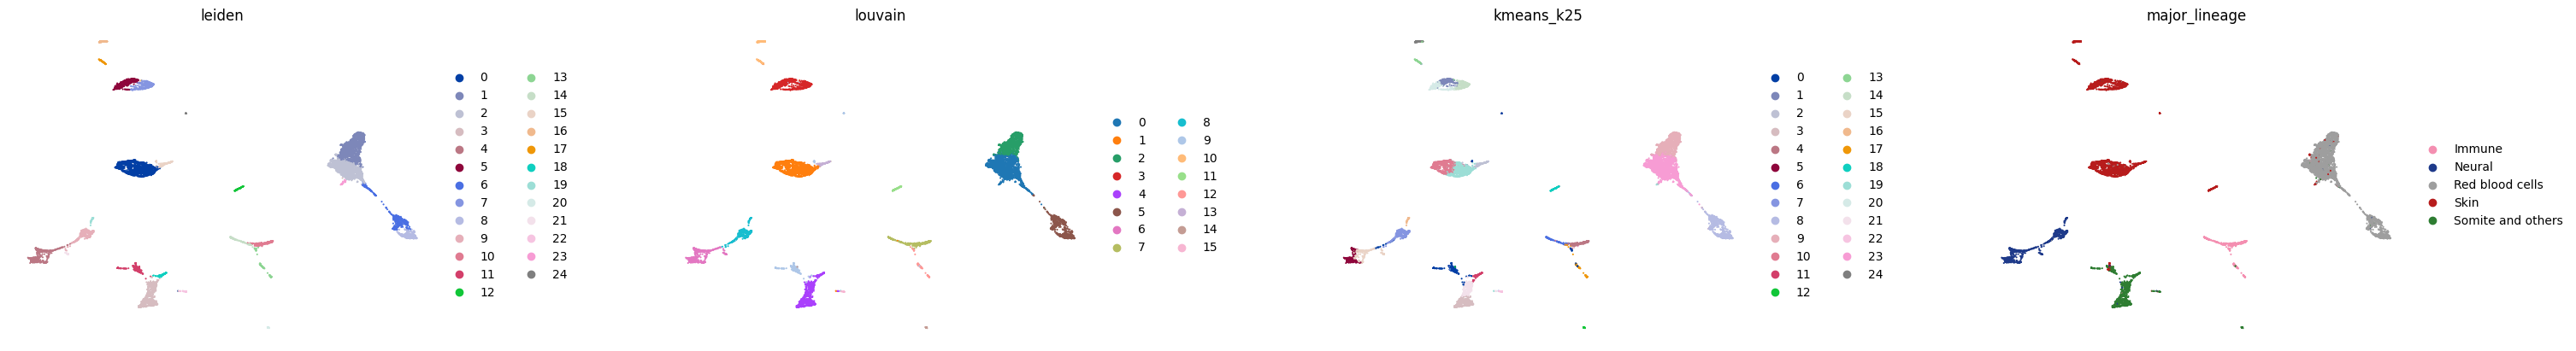

In [20]:
import os

sc.pl.umap(
    adata,
    color=['leiden', 'louvain', f'kmeans_k{k}', 'major_lineage'],
    wspace=0.4, frameon=False
)


In [21]:
# Compute clustering metrics

import numpy as np, pandas as pd
from sklearn.metrics import (
    silhouette_score, adjusted_rand_score, rand_score,
    normalized_mutual_info_score, calinski_harabasz_score, davies_bouldin_score
)

X = adata.obsm['X_pca']
label_cols = ['leiden', 'louvain', f'kmeans_k{k}']

def metrics_for(col):
    y_pred = pd.Categorical(adata.obs[col]).codes
    res = {
        'labels': col,
        'n_clusters': len(np.unique(y_pred)),
        'silhouette': silhouette_score(X, y_pred),
        'calinski_harabasz': calinski_harabasz_score(X, y_pred),   # bonus
        'davies_bouldin': davies_bouldin_score(X, y_pred),         # bonus
    }
    if 'cluster' in adata.obs.columns:
        y_true = pd.Categorical(adata.obs['cluster']).codes
        res.update({
            'ARI_vs_truth': adjusted_rand_score(y_true, y_pred),
            'Rand_vs_truth': rand_score(y_true, y_pred),
            'NMI_vs_truth': normalized_mutual_info_score(y_true, y_pred),
        })
    return res

metrics_df = pd.DataFrame([metrics_for(c) for c in label_cols])
display(metrics_df)


from itertools import combinations
pair_rows = []
for a, b in combinations(label_cols, 2):
    ya = pd.Categorical(adata.obs[a]).codes
    yb = pd.Categorical(adata.obs[b]).codes
    pair_rows.append({
        'pair': f'{a} vs {b}',
        'ARI': adjusted_rand_score(ya, yb),
        'Rand': rand_score(ya, yb),
        'NMI': normalized_mutual_info_score(ya, yb),
    })
pair_df = pd.DataFrame(pair_rows)
display(pair_df)


,labels,n_clusters,silhouette,calinski_harabasz,davies_bouldin,ARI_vs_truth,Rand_vs_truth,NMI_vs_truth
0,leiden,25,0.304777,2534.641602,1.146740,0.537074,0.924324,0.736277
1,louvain,16,0.324018,2762.096191,1.218723,0.562606,0.921367,0.729191
2,kmeans_k25,25,0.296556,2916.234375,1.306158,0.458259,0.914450,0.719875


,pair,ARI,Rand,NMI
0,leiden vs louvain,0.769769,0.961987,0.885081
1,leiden vs kmeans_k25,0.688124,0.955636,0.865293
2,louvain vs kmeans_k25,0.791431,0.966716,0.880945


## Marker Selection and Gene Analysis

In [22]:

ad_skin = adata[adata.obs['major_lineage'] == 'Skin'].copy()
print(sorted(map(str, ad_skin.obs['cluster'].unique()))[:100])


['Alpha ionocyte', 'Beta ionocyte', 'Epidermis', 'Goblet cell', 'Melanocyte', 'Melanocyte precursor', 'Melanocyte stem cell', 'ROCs', 'Small secretory cell', 'laminin-rich epidermis']


In [23]:
import re, numpy as np, pandas as pd, scanpy as sc

ad_skin = adata[adata.obs['major_lineage'] == 'Skin'].copy()

roc_group = "ROCs"

use_layer = 'counts' if 'counts' in ad_skin.layers else None
if use_layer is None and ad_skin.raw is None:
    ad_skin.raw = ad_skin

In [24]:
import scanpy as sc
import pandas as pd

ad_skin_de = ad_skin.copy()
if 'counts' in ad_skin_de.layers:
    ad_skin_de.X = ad_skin_de.layers['counts'].copy()

sc.pp.normalize_total(ad_skin_de, target_sum=1e4)
sc.pp.log1p(ad_skin_de)

In [25]:
# Wilcoxon
sc.tl.rank_genes_groups(
    ad_skin_de, groupby='cluster', groups=[roc_group], reference='rest',
    method='wilcoxon', corr_method='benjamini-hochberg',
    key_added='rank_wilcoxon', use_raw=False
)

# t-test
sc.tl.rank_genes_groups(
    ad_skin_de, groupby='cluster', groups=[roc_group], reference='rest',
    method='t-test_overestim_var', corr_method='benjamini-hochberg',
    key_added='rank_ttest', use_raw=False
)

# Logistic regression
sc.tl.rank_genes_groups(
    ad_skin_de, groupby='cluster',
    method='logreg', key_added='rank_logreg_all', use_raw=False
)


def top_markers(adata, key, group, n=100, p_adj_max=0.05, lfc_min=0.0):
    df = sc.get.rank_genes_groups_df(adata, group=group, key=key)
    if 'pvals_adj' in df:      df = df[df['pvals_adj'] <= p_adj_max]
    if 'logfoldchanges' in df: df = df[df['logfoldchanges'] >= lfc_min]

    sort_cols = ['scores'] if 'scores' in df.columns else None
    if sort_cols: df = df.sort_values(sort_cols, ascending=False)
    return df.head(n).reset_index(drop=True)

df_wil = top_markers(ad_skin_de, 'rank_wilcoxon',    roc_group, n=100)
df_t   = top_markers(ad_skin_de, 'rank_ttest',       roc_group, n=100)
df_log = top_markers(ad_skin_de, 'rank_logreg_all',  roc_group, n=100)

display(df_wil.head(10)); display(df_t.head(10)); display(df_log.head(10))


,names,scores,logfoldchanges,pvals,pvals_adj
0,loc100486548.L,23.730879,4.408226,1.731386e-124,4.530344e-120
1,apoc1.like.L,23.157187,6.614151,1.230517e-118,1.609885e-114
2,fn1.S,23.092142,6.514261,5.553185e-118,4.843488e-114
3,col14a1.S,22.992632,4.051670,5.523607e-117,3.613268e-113
4,lama5.L,21.772087,3.681962,4.267418e-105,2.233225e-101
5,frem2.1.L,21.654480,5.416734,5.514921e-104,2.405057e-100
6,fras1.L,21.563620,3.708249,3.945050e-103,1.474660e-99
7,krt8.L,20.625690,5.115015,1.614121e-94,5.279385e-91
8,fstl1.L,20.613846,4.296592,2.061774e-94,5.994264e-91
9,nid2.L,20.577253,6.483984,4.388616e-94,1.148325e-90


,names,scores,logfoldchanges,pvals,pvals_adj
0,loc100486548.L,29.943693,4.408226,1.582447e-113,4.140631e-109
1,fn1.S,29.165329,6.514261,3.456863e-89,2.261307e-85
2,col14a1.S,27.254438,4.051670,2.556808e-101,3.345071e-97
3,apoc1.like.L,26.684267,6.614151,1.399155e-98,1.220343e-94
4,frem2.1.L,24.590744,5.416734,7.318315e-77,2.735586e-73
5,lama5.L,23.895603,3.681962,7.222799e-84,3.779835e-80
6,fras1.L,23.539856,3.708249,9.970182e-82,4.347996e-78
7,krt8.L,23.295267,5.115015,3.882782e-72,1.269961e-68
8,nid2.L,22.663395,6.483984,3.034107e-65,7.217313e-62
9,Xetrov90029035m.L,22.366522,7.138573,1.484448e-63,2.987851e-60


,names,scores
0,apoc1.like.L,0.219356
1,pltp.S,0.168360
2,Xetrov90029035m.L,0.141078
3,fn1.S,0.131578
4,frem2.1.L,0.121437
5,id3.L,0.120521
6,nid2.L,0.118323
7,loc100486548.L,0.117553
8,fstl1.L,0.116212
9,lama5.L,0.100366


In [26]:
# Compare the identified markers across different methods

wil_genes = set(df_wil['names'].str.upper())
t_genes   = set(df_t['names'].str.upper())
log_genes = set(df_log['names'].str.upper())

intersect_all = wil_genes & t_genes & log_genes
union_all     = wil_genes | t_genes | log_genes

print(len(intersect_all)); print(sorted(list(intersect_all))[:30])


all_genes = sorted(list(union_all))
comp_df = pd.DataFrame({
    'gene': all_genes,
    'wilcoxon': [g in wil_genes for g in all_genes],
    't_test_overvar': [g in t_genes for g in all_genes],
    'logreg': [g in log_genes for g in all_genes],
})
comp_df['methods_hit'] = comp_df[['wilcoxon','t_test_overvar','logreg']].sum(1)
comp_df.sort_values(['methods_hit','gene'], ascending=[False,True], inplace=True)
display(comp_df.head(30))


59
['ACVR1.L', 'APOC1.LIKE.L', 'APP.S', 'BAMBI.L', 'BAMBI.S', 'BHLHA9.S', 'BMP2.L', 'BMP4.S', 'CLDN6.1.S', 'COL14A1.L', 'COL14A1.S', 'COL27A1.S', 'CPA6.L', 'CPAMD8.L', 'EFEMP2.L', 'EGFL6.L', 'EGFL6.S', 'FGF7.L', 'FGF9.L', 'FN1.S', 'FRAS1.L', 'FREM2.1.L', 'FSTL1.L', 'GPX3.L', 'ID3.L', 'ID3.S', 'IFITM1.S', 'KRT18.L', 'KRT8.L', 'LAMA1.L']


,gene,wilcoxon,t_test_overvar,logreg,methods_hit
1,ACVR1.L,True,True,True,3
5,APOC1.LIKE.L,True,True,True,3
6,APP.S,True,True,True,3
8,BAMBI.L,True,True,True,3
9,BAMBI.S,True,True,True,3
11,BHLHA9.S,True,True,True,3
12,BMP2.L,True,True,True,3
14,BMP4.S,True,True,True,3
20,CLDN6.1.S,True,True,True,3
22,COL14A1.L,True,True,True,3


In [27]:
# Annotate the clusters
import re
from collections import Counter

def base(s):
    return re.sub(r'\.(L|S)$','', str(s).strip().upper())

S_wil  = {base(g) for g in df_wil['names'].dropna().astype(str)}
S_t    = {base(g) for g in df_t['names'].dropna().astype(str)}
S_log  = {base(g) for g in df_log['names'].dropna().astype(str)}

strict_intersection = S_wil & S_t & S_log
majority_consensus  = {g for g,c in Counter(list(S_wil)+list(S_t)+list(S_log)).items() if c >= 2}
union_all           = S_wil | S_t | S_log

print(f"Strict: {len(strict_intersection)}")
print(f"Majority: {len(majority_consensus)}")
print(f"Union: {len(union_all)}")

Strict: 54
Majority: 84
Union: 125


In [28]:
the_adata = ad_skin_de
vmap = {base(v): v for v in the_adata.var_names.astype(str)}

def to_var_names(bases):
    return [vmap[b] for b in bases if b in vmap]

roc_markers_consensus= to_var_names(majority_consensus)

print(len(roc_markers_consensus))
print(roc_markers_consensus[:20])

84
['optc.S', 'lef1.S', 'mxra5.S', 'frem2.1.L', 'jag1.S', 'prdm1.S', 'zfp36l1.L', 'cpamd8.L', 'p4hb.L', 'krt18.S', 'fgfr4.S', 'unc5b.S', 'loc100486548.S', 'fras1.S', 'lamc1.S', 'bmp7.1.S', 'pltp.S', 'gpx3.S', 'Xetrov90029035m.L', 'fgf7.S']


/tmp/ipython-input-657158619.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ad_skin_de.obs.groupby("cluster")["ROC_score"]


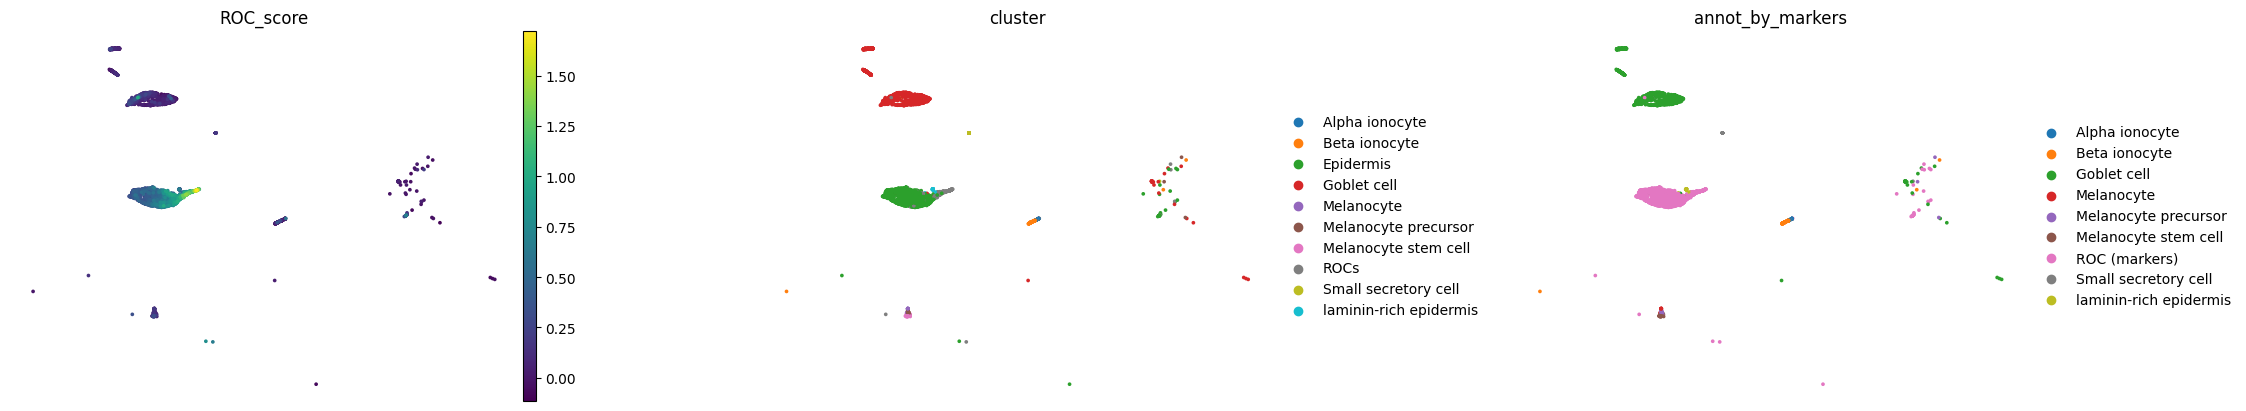

Top clusters by mean ROC_score:


,ROC_score
cluster,
ROCs,1.097282
Epidermis,0.434206
laminin-rich epidermis,0.410764
Melanocyte stem cell,0.127386
Melanocyte,0.092025
Melanocyte precursor,0.056896
Small secretory cell,0.051940
Goblet cell,0.047639
Beta ionocyte,0.001938


In [29]:
import numpy as np
import pandas as pd
import scanpy as sc

sc.tl.score_genes(
    ad_skin_de,
    gene_list=roc_markers_consensus,
    score_name="ROC_score",
    use_raw=False
)

cluster_mean = (
    ad_skin_de.obs.groupby("cluster")["ROC_score"]
         .mean()
         .sort_values(ascending=False)
)

med = cluster_mean.median()
mad = (cluster_mean - med).abs().median()
thr = max(med + 0.5 * mad, cluster_mean.quantile(0.80))

roc_clusters = cluster_mean.index[cluster_mean >= thr].tolist()


ad_skin_de.obs["annot_by_markers"] = ad_skin_de.obs["cluster"].astype(str)
ad_skin_de.obs.loc[ad_skin_de.obs["cluster"].isin(roc_clusters), "annot_by_markers"] = "ROC (markers)"

ad_skin_de.uns["annot_by_markers_info"] = {
    "roc_markers_used": list(roc_markers_consensus),
    "cluster_mean_ROC_score": cluster_mean.to_dict(),
    "threshold": float(thr),
    "roc_clusters": roc_clusters,
    "rule": "cluster_mean >= max(median+0.5*MAD, 80th percentile)"
}

sc.pl.umap(
    ad_skin_de,
    color=["ROC_score", "cluster", "annot_by_markers"],
    frameon=False,
    wspace=0.35
)

print("Top clusters by mean ROC_score:")
display(cluster_mean.to_frame(name='ROC_score').head(10))

In [30]:
# Table 3
import os, pandas as pd

path_table = "/content/drive/MyDrive/5243-Project1/Table_S3.xlsx"

xl = pd.ExcelFile(path_table)
print("Sheets:", xl.sheet_names)

Sheets: ['S-phase genes', 'G2M genes', 'FGF ligands', 'WNT ligands', 'BMP ligands', 'DELTA ligands', 'TGFß ligands', 'FGF receptors', 'WNT receptors', 'BMP receptors', 'NOTCH receptors', 'TGFß receptors', 'ROC markers']


In [31]:
import re, pandas as pd

df_s3 = pd.read_excel(path_table, sheet_name="ROC markers")
print(list(df_s3.columns))

['wnt5a']


In [32]:
import re, pandas as pd

sheet = "ROC markers"
df_raw = pd.read_excel(path_table, sheet_name=sheet, header=None)

col_ix = df_raw.apply(lambda c: c.notna().sum()).idxmax()
genes_raw = df_raw[col_ix].dropna().astype(str)

genes_raw = (genes_raw.str.strip()
                        .str.replace(r"\s+", "", regex=True))
genes_raw = genes_raw[genes_raw != ""]

roc_list = list(dict.fromkeys(genes_raw.tolist()))
print(f"Table S3 ROC genes (raw, unique): {len(roc_list)}")

Table S3 ROC genes (raw, unique): 45


In [33]:
var_upper = {v.upper(): v for v in adata.var_names}

def map_to_var(g):
    u = g.upper()
    if u in var_upper:
        return var_upper[u]
    if (u + ".L") in var_upper:
        return var_upper[u + ".L"]
    if (u + ".S") in var_upper:
        return var_upper[u + ".S"]
    return u

roc_in_var = [map_to_var(g) for g in roc_list]
roc_set = set(roc_in_var)

matched = sum([x in adata.var_names for x in roc_in_var])
print(matched)

unmatched = [g for g in roc_in_var if g not in adata.var_names]
print(unmatched[:20])

41
['XELAEV18043128M', 'XELAEV18046800M', 'XELAEV18044182M', 'XELAEV18034799M']


In [34]:
import re, pandas as pd

def canon(s: str) -> str:
    s = str(s).strip().upper()
    s = re.sub(r"[^A-Z0-9\.]", "", s)
    return s

def base_symbol(s: str) -> str:
    s = canon(s)
    return re.sub(r"\.(L|S)$", "", s)


wil_names = [canon(x) for x in df_wil['names']]
t_names   = [canon(x) for x in df_t['names']]
log_names = [canon(x) for x in df_log['names']]


wil_base = {base_symbol(x) for x in wil_names}
t_base   = {base_symbol(x) for x in t_names}
log_base = {base_symbol(x) for x in log_names}


s3_raw = df_s3.iloc[:,0].dropna().astype(str)
s3_canon = [canon(x) for x in s3_raw]
s3_base  = {base_symbol(x) for x in s3_canon}

print(len(s3_base))

44


In [35]:
def compare_one(method_name, method_base_set):
    overlap = s3_base & method_base_set
    jacc    = len(overlap) / (len(s3_base | method_base_set) or 1)
    prec    = len(overlap) / (len(method_base_set) or 1)
    reca    = len(overlap) / (len(s3_base) or 1)

    return {
        "method": method_name,
        "n_markers": len(method_base_set),
        "overlap_n": len(overlap),
        "overlap_%(S3→method)": round(100*reca, 2),
        "precision_%(method→S3)": round(100*prec, 2),
        "jaccard(S3,method)": round(jacc, 3),
        "overlap_list": sorted(list(overlap))[:30]
    }

summary_rows = [
    compare_one("wilcoxon",       wil_base),
    compare_one("t_test_overvar", t_base),
    compare_one("logreg",         log_base),
]
summary_df = pd.DataFrame(summary_rows)
display(summary_df)


only_wil = sorted(list((wil_base - t_base - log_base) & s3_base))[:30]
only_t   = sorted(list((t_base  - wil_base - log_base) & s3_base))[:30]
only_log = sorted(list((log_base - wil_base - t_base) & s3_base))[:30]

print("all three and in table:", sorted(list((wil_base & t_base & log_base) & s3_base))[:30])
print("only w:", only_wil)
print("only t:", only_t)
print("only lg:", only_log)


adata_base_all = {base_symbol(g) for g in adata.var_names}
missing_in_adata = sorted(list(s3_base - adata_base_all))[:30]
print("no match:", missing_in_adata)

,method,n_markers,overlap_n,overlap_%(S3→method),precision_%(method→S3),"jaccard(S3,method)",overlap_list
0,wilcoxon,88,17,38.64,19.32,0.148,"[CPA6, EGFL6, FGF7, FGF9, FGFR4, FREM2, IGFBP2..."
1,t_test_overvar,84,19,43.18,22.62,0.174,"[CPA6, DLX2, EGFL6, FGF7, FGF9, FGFR4, FREM2, ..."
2,logreg,91,13,29.55,14.29,0.107,"[CPA6, EGFL6, FGF7, FGF9, GDF6, LPAR3, NID2, P..."


all three and in table: ['CPA6', 'EGFL6', 'FGF7', 'FGF9', 'LPAR3', 'NID2', 'PLTP', 'SP9', 'TINAGL1', 'UNC5B', 'VWDE']
only w: []
only t: ['DLX2', 'RSPO2']
only lg: ['GDF6', 'SEMA3F']
no match: ['XELAEV18034799M', 'XELAEV18043128M', 'XELAEV18044182M', 'XELAEV18046800M']


## Data Denoising

In [57]:
import numpy as np
import pandas as pd
import scanpy as sc
from scipy import sparse
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

BASE = ad_skin_de.copy()
np.random.seed(0)
ROC_CANONICAL = "ROCs"

try:
    from IPython.display import display
except Exception:
    def display(x): print(x)

def top_markers(ad, group, key, n=50, p_adj_max=0.05):
    df = sc.get.rank_genes_groups_df(ad, group=group, key=key)
    if "pvals_adj" in df.columns:
        df = df[df["pvals_adj"] <= p_adj_max]
    return list(df.sort_values("scores", ascending=False)["names"].head(n).astype(str))

def compare_sets(a, b):
    A, B = set(map(str.upper, a)), set(map(str.upper, b))
    inter = A & B
    jac = len(inter)/len(A|B) if (A|B) else 0.0
    return {"intersect_n": len(inter), "jaccard": jac, "intersect": sorted(inter)}

def metrics_from(ad, label_col, emb_key="X_pca", n_dims=20):
    emb = ad.obsm[emb_key][:, :min(n_dims, ad.obsm[emb_key].shape[1])]
    labs = ad.obs[label_col].astype(str).values
    return {
        "silhouette":        silhouette_score(emb, labs, metric="euclidean"),
        "calinski_harabasz": calinski_harabasz_score(emb, labs),
        "davies_bouldin":    davies_bouldin_score(emb, labs),
    }

def pick_roc_group_by_score(ad, label_col, gene_list, score_name="ROC_score_tmp"):
    sc.tl.score_genes(ad, gene_list=gene_list, score_name=score_name, use_raw=False)
    m = (ad.obs.groupby(label_col)[score_name]
           .mean()
           .sort_values(ascending=False))
    return m.index[0], m

In [58]:
# Baseline
raw = BASE.copy()
sc.pp.scale(raw, max_value=10)
sc.tl.pca(raw, n_comps=50, svd_solver="arpack")
sc.pp.neighbors(raw, n_neighbors=15, n_pcs=50)
sc.tl.leiden(raw, key_added="leiden_raw", resolution=1.0)


sc.tl.rank_genes_groups(
    raw, groupby="cluster", groups=[ROC_CANONICAL], reference="rest",
    method="wilcoxon", key_added="rank_raw_ref", use_raw=False
)
roc_marker_panel = top_markers(raw, ROC_CANONICAL, key="rank_raw_ref", n=80)

roc_raw, mean_tbl_raw = pick_roc_group_by_score(raw, label_col="leiden_raw", gene_list=roc_marker_panel)
sc.tl.rank_genes_groups(
    raw, groupby="leiden_raw", groups=[roc_raw], reference="rest",
    method="wilcoxon", key_added="rank_wilcoxon_raw", use_raw=False
)
markers_raw = top_markers(raw, roc_raw, key="rank_wilcoxon_raw", n=50)
metrics_raw = metrics_from(raw, label_col="leiden_raw", emb_key="X_pca")

print(roc_raw)
display(mean_tbl_raw.head(10))

/usr/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/tmp/ipython-input-3973618312.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  m = (ad.obs.groupby(label_col)[score_name]


10


/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


,ROC_score_tmp
leiden_raw,
10,1.902557
12,0.866444
6,0.578152
5,0.294694
15,0.252367
19,0.217915
7,0.168711
3,0.031647
1,0.029680


In [59]:
# PCA
pca_d = BASE.copy()
sc.pp.scale(pca_d, max_value=10)
sc.tl.pca(pca_d, n_comps=50, svd_solver="arpack")

k = 30
U = pca_d.obsm["X_pca"][:, :k]
V = pca_d.varm["PCs"][:, :k]
X_denoised = U @ V.T
pca_d.X = X_denoised

sc.pp.scale(pca_d, max_value=10)
sc.tl.pca(pca_d, n_comps=50, svd_solver="arpack")
sc.pp.neighbors(pca_d, n_neighbors=15, n_pcs=50)
sc.tl.leiden(pca_d, key_added="leiden_pca", resolution=1.0)

roc_pca, mean_tbl_pca = pick_roc_group_by_score(pca_d, label_col="leiden_pca", gene_list=roc_marker_panel)
sc.tl.rank_genes_groups(
    pca_d, groupby="leiden_pca", groups=[roc_pca], reference="rest",
    method="wilcoxon", key_added="rank_wilcoxon_pca", use_raw=False
)
markers_pca = top_markers(pca_d, roc_pca, key="rank_wilcoxon_pca", n=50)
metrics_pca = metrics_from(pca_d, label_col="leiden_pca", emb_key="X_pca")

print(roc_pca)
display(mean_tbl_pca.head(10))

/usr/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)
/tmp/ipython-input-3973618312.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  m = (ad.obs.groupby(label_col)[score_name]
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


10


,ROC_score_tmp
leiden_pca,
10,1.361642
6,0.243882
4,0.237967
12,0.227066
16,0.151984
14,0.127589
1,0.104325
20,0.035565
11,0.017084


In [60]:
# kNN 图平滑
knn_d = BASE.copy()

sc.pp.scale(knn_d, max_value=10)
sc.tl.pca(knn_d, n_comps=50, svd_solver="arpack")
sc.pp.neighbors(knn_d, n_neighbors=15, n_pcs=50)

G = knn_d.obsp["connectivities"].tocsr()
X = knn_d.X.tocsr() if sparse.issparse(knn_d.X) else sparse.csr_matrix(knn_d.X)
row_sum = np.array(G.sum(axis=1)).ravel()
W = sparse.diags(1.0/(row_sum + 1e-12)) @ G
X_smooth = W @ X
knn_d.X = X_smooth

sc.pp.scale(knn_d, max_value=10)
sc.tl.pca(knn_d, n_comps=50, svd_solver="arpack")
sc.pp.neighbors(knn_d, n_neighbors=15, n_pcs=50)
sc.tl.leiden(knn_d, key_added="leiden_knn", resolution=1.0)

roc_knn, mean_tbl_knn = pick_roc_group_by_score(knn_d, label_col="leiden_knn", gene_list=roc_marker_panel)
sc.tl.rank_genes_groups(
    knn_d, groupby="leiden_knn", groups=[roc_knn], reference="rest",
    method="wilcoxon", key_added="rank_wilcoxon_knn", use_raw=False
)
markers_knn = top_markers(knn_d, roc_knn, key="rank_wilcoxon_knn", n=50)
metrics_knn = metrics_from(knn_d, label_col="leiden_knn", emb_key="X_pca")

print(roc_knn)
display(mean_tbl_knn.head(10))

/usr/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)
/usr/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)
/tmp/ipython-input-3973618312.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  m = (ad.obs.groupby(label_col)[score_name]
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


12


,ROC_score_tmp
leiden_knn,
12,2.614221
20,1.558694
3,0.955716
15,0.702325
39,0.518124
27,0.459203
2,0.453780
5,0.377740
32,0.334058


In [61]:
# Impact on Clustering Analysis
metrics_df = pd.DataFrame([
    {"method":"raw",         **metrics_raw},
    {"method":"pca_lowrank", **metrics_pca},
    {"method":"knn_smooth",  **metrics_knn},
]).set_index("method")

display(metrics_df)

,silhouette,calinski_harabasz,davies_bouldin
method,,,
raw,0.196180,611.096741,1.600300
pca_lowrank,0.169749,309.048553,1.578125
knn_smooth,0.171032,483.792145,1.409341


In [62]:
# Impact on Marker Selection
cmp_pca = compare_sets(markers_raw, markers_pca)
cmp_knn = compare_sets(markers_raw, markers_knn)

marker_comp = pd.DataFrame([
    {"method":"pca_lowrank", "intersect_n":cmp_pca["intersect_n"], "jaccard":cmp_pca["jaccard"]},
    {"method":"knn_smooth",  "intersect_n":cmp_knn["intersect_n"], "jaccard":cmp_knn["jaccard"]},
]).set_index("method")

display(marker_comp)
print("Example overlap (pca_lowrank):", cmp_pca["intersect"][:20])
print("Example overlap (knn_smooth):",  cmp_knn["intersect"][:20])


,intersect_n,jaccard
method,,
pca_lowrank,17,0.204819
knn_smooth,26,0.351351


Example overlap (pca_lowrank): ['APOC1.LIKE.L', 'BMP2.L', 'BMP4.L', 'COL14A1.S', 'EFEMP2.L', 'EGFL6.L', 'FN1.S', 'FREM2.1.L', 'KRT18.L', 'LAMA1.L', 'LAMC1.S', 'LPAR3.L', 'MMP3.L', 'MXRA5.S', 'NID2.L', 'XELAEV18026267M.G', 'XETROV90029035M.L']
Example overlap (knn_smooth): ['APOC1.LIKE.L', 'APP.S', 'BMP2.L', 'BMP4.L', 'CCDC3.L', 'CLDN6.2.S', 'COL14A1.S', 'EFEMP2.L', 'EGFL6.L', 'FN1.S', 'FRAS1.L', 'FREM2.1.L', 'FSTL1.L', 'KRT18.L', 'KRT8.L', 'LAMA1.L', 'LAMA5.L', 'LAMC1.S', 'LOC100486548.L', 'LPAR3.L']


## Batch Integration over time

In [63]:
!pip -q install harmonypy bbknn

In [64]:
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

ad_base = ad_skin_de.copy()

dpa = ad_base.obs["DaysPostAmputation"].astype(int)
levels = sorted(dpa.unique().tolist())
ad_base.obs["time_key"] = pd.Categorical(dpa, categories=levels, ordered=True)

In [65]:
def _metrics_from(emb, labels):
    return {
        "silhouette": float(silhouette_score(emb, labels, metric="euclidean")),
        "calinski_harabasz": float(calinski_harabasz_score(emb, labels)),
        "davies_bouldin": float(davies_bouldin_score(emb, labels)),
    }

def _pick_roc_clusters(adata, label_col, gene_list, score_col="ROC_score_tmp"):
    sc.tl.score_genes(adata, gene_list=gene_list, score_name=score_col, use_raw=False)
    cm = adata.obs.groupby(label_col)[score_col].mean().sort_values(ascending=False)
    med = cm.median()
    mad = (cm - med).abs().median()
    thr = max(med + 0.5*mad, cm.quantile(0.80))
    roc_like = cm.index[cm >= thr].astype(str).tolist()
    return roc_like, cm, float(thr)

def _top_markers(adata, group_list, groupby, key_added, n=50, p_adj_max=0.05):
    sc.tl.rank_genes_groups(
        adata, groupby=groupby, groups=group_list, reference="rest",
        method="wilcoxon", key_added=key_added, use_raw=False
    )
    all_genes = []
    for g in group_list:
        df = sc.get.rank_genes_groups_df(adata, group=g, key=key_added)
        if "pvals_adj" in df:
            df = df[df["pvals_adj"] <= p_adj_max]
        df = df.sort_values("scores", ascending=False).head(n)
        all_genes.extend(df["names"].astype(str).tolist())

    seen, uniq = set(), []
    for x in all_genes:
        if x not in seen:
            seen.add(x); uniq.append(x)
    return uniq

def _compare_sets(a, b):
    A, B = set(map(str.upper, a)), set(map(str.upper, b))
    inter = sorted(A & B)
    jacc = (len(inter) / len(A | B)) if (A | B) else 0.0
    return {"intersect_n": len(inter), "jaccard": jacc, "intersect": inter}

In [66]:
# Baseline
ad_raw = ad_base.copy()
sc.pp.scale(ad_raw, max_value=10)
sc.tl.pca(ad_raw, n_comps=50, svd_solver="arpack")
sc.pp.neighbors(ad_raw, n_neighbors=15, n_pcs=50)
sc.tl.umap(ad_raw)
sc.tl.leiden(ad_raw, key_added="leiden_raw", resolution=1.0)

metrics_raw = _metrics_from(ad_raw.obsm["X_pca"][:, :20], ad_raw.obs["leiden_raw"].values)
roc_like_raw, cm_raw, thr_raw = _pick_roc_clusters(ad_raw, "leiden_raw", roc_markers_consensus)
markers_raw = _top_markers(ad_raw, roc_like_raw, groupby="leiden_raw", key_added="rank_wilcoxon_raw", n=50)

print(roc_like_raw)
display(cm_raw.to_frame("ROC_score_tmp"))

/usr/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)
/tmp/ipython-input-2654682598.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cm = adata.obs.groupby(label_col)[score_col].mean().sort_values(ascending=False)


['10', '12', '6', '5']


/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


,ROC_score_tmp
leiden_raw,
10,1.494985
12,0.631998
6,0.440895
5,0.245028
15,0.214557
19,0.166556
7,0.112050
3,0.044686
1,0.039877


In [67]:
# Harmony
ad_hm = ad_base.copy()
sc.pp.scale(ad_hm, max_value=10)
sc.tl.pca(ad_hm, n_comps=50, svd_solver="arpack")
sce.pp.harmony_integrate(ad_hm, key="time_key")
sc.pp.neighbors(ad_hm, use_rep="X_pca_harmony", n_neighbors=15)
sc.tl.umap(ad_hm)
sc.tl.leiden(ad_hm, key_added="leiden_harmony", resolution=1.0)

metrics_hm = _metrics_from(ad_hm.obsm["X_pca_harmony"][:, :20], ad_hm.obs["leiden_harmony"].values)
roc_like_hm, cm_hm, thr_hm = _pick_roc_clusters(ad_hm, "leiden_harmony", roc_markers_consensus)
markers_hm = _top_markers(ad_hm, roc_like_hm, groupby="leiden_harmony", key_added="rank_wilcoxon_harmony", n=50)

print(roc_like_hm)
display(cm_hm.to_frame("ROC_score_tmp"))


/usr/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)
2025-10-05 07:24:35,067 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2025-10-05 07:24:35,928 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2025-10-05 07:24:35,950 - harmonypy - INFO - Iteration 1 of 10
INFO:harmonypy:Iteration 1 of 10
2025-10-05 07:24:36,650 - harmonypy - INFO - Iteration 2 of 10
INFO:harmonypy:Iteration 2 of 10
2025-10-05 07:24:37,320 - harmonypy - INFO - Iteration 3 of 10
INFO:harmonypy:Iteration 3 of 10
2025-10-05 07:24:38,004 - harmonypy - INFO - Iteration 4 of 10
INFO:harmonypy:Iteration 4 of 10
2025-10-05 07:24:38,745 - harmonypy - INFO - Iteration 5 of 10
INFO:harmonypy:Iteration 5 of 10
2025-10-05 07:24:39,958 - harmonypy - INFO - Converged after 5 ite

['8', '3', '15', '9']


/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


,ROC_score_tmp
leiden_harmony,
8,1.542288
3,0.493630
15,0.288514
9,0.230400
19,0.205704
0,0.138869
18,0.020564
2,0.005070
14,-0.109674


In [68]:
# BBKNN
ad_bb = ad_base.copy()
sc.pp.scale(ad_bb, max_value=10)
sc.tl.pca(ad_bb, n_comps=50, svd_solver="arpack")
sce.pp.bbknn(ad_bb, batch_key="time_key")
sc.tl.umap(ad_bb)
sc.tl.leiden(ad_bb, key_added="leiden_bbknn", resolution=1.0)

metrics_bb = _metrics_from(ad_bb.obsm["X_pca"][:, :20], ad_bb.obs["leiden_bbknn"].values)
roc_like_bb, cm_bb, thr_bb = _pick_roc_clusters(ad_bb, "leiden_bbknn", roc_markers_consensus)
markers_bb = _top_markers(ad_bb, roc_like_bb, groupby="leiden_bbknn", key_added="rank_wilcoxon_bbknn", n=50)

print(roc_like_bb)
display(cm_bb.to_frame("ROC_score_tmp"))

/usr/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


/tmp/ipython-input-2654682598.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cm = adata.obs.groupby(label_col)[score_col].mean().sort_values(ascending=False)


['7', '3', '0']


/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


,ROC_score_tmp
leiden_bbknn,
7,1.370412
3,0.479499
0,0.122309
2,0.019671
10,-0.184936
1,-0.194350
9,-0.238246
12,-0.247696
6,-0.294396


In [69]:
# Impact on Clustering Analysis

metrics_df = pd.DataFrame.from_dict({
    "raw": metrics_raw, "harmony": metrics_hm, "bbknn": metrics_bb
}, orient="index")
display(metrics_df)

,silhouette,calinski_harabasz,davies_bouldin
raw,0.196180,611.096741,1.600300
harmony,0.215216,739.098920,1.373023
bbknn,0.185155,758.076477,1.473266


In [70]:
# Impact on Marker Selection
cmp_hm  = _compare_sets(markers_raw, markers_hm)
cmp_bb  = _compare_sets(markers_raw, markers_bb)
cmp_df = pd.DataFrame([
    {"method":"harmony", **cmp_hm},
    {"method":"bbknn",  **cmp_bb},
]).set_index("method")
display(cmp_df)

print("Example overlap (harmony):", cmp_hm["intersect"][:20])
print("Example overlap (bbknn):",  cmp_bb["intersect"][:20])

,intersect_n,jaccard,intersect
method,,,
harmony,91,0.404444,"[APOC1.LIKE.L, APOE.S, APP.S, BAMBI.L, BAMBI.S..."
bbknn,99,0.611111,"[APOC1.LIKE.L, APOE.L, APOE.S, APP.S, BAMBI.L,..."


Example overlap (harmony): ['APOC1.LIKE.L', 'APOE.S', 'APP.S', 'BAMBI.L', 'BAMBI.S', 'BMP4.L', 'CCDC3.L', 'CLDN1.L', 'CLDN6.2.S', 'COL14A1.L', 'COL14A1.S', 'COL2A1.L', 'COL4A5.L', 'COL5A3.LIKE.L', 'COL5A3.LIKE.S', 'CPAMD8.L', 'CRIP1.L', 'CST3.L', 'DCN.L', 'DCN.S']
Example overlap (bbknn): ['APOC1.LIKE.L', 'APOE.L', 'APOE.S', 'APP.S', 'BAMBI.L', 'C2ORF40.L', 'CCDC3.L', 'CFL1.L', 'CLDN1.L', 'CLDN6.2.S', 'COL11A1.LIKE.L', 'COL14A1.L', 'COL14A1.S', 'COL17A1.L', 'COL1A1.L', 'COL1A2.S', 'COL2A1.L', 'COL4A5.L', 'COL5A3.LIKE.L', 'COL5A3.LIKE.S']


##